In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_excel('../data/拟合站原始功率预测&市场披露数据.xlsx')
# 取出所需列并去除缺失值
df_filtered = df[['日前电力值(MW)', '原始功率预测均值（MW）']].dropna()
poly = PolynomialFeatures(degree=2)

🔄 核心思路
我们现在想要拟合这样的函数关系：
`日前电力值 = f(原始功率预测均值)`
也就是将「原始功率预测均值」作为 输入变量（X），而将「日前电力值」作为 目标变量（y）。

In [24]:
# 变量重命名
X = df_filtered[['原始功率预测均值（MW）']].values
y = df_filtered['日前电力值(MW)'].values

# 拟合线性回归
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 拟合二次多项式回归
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

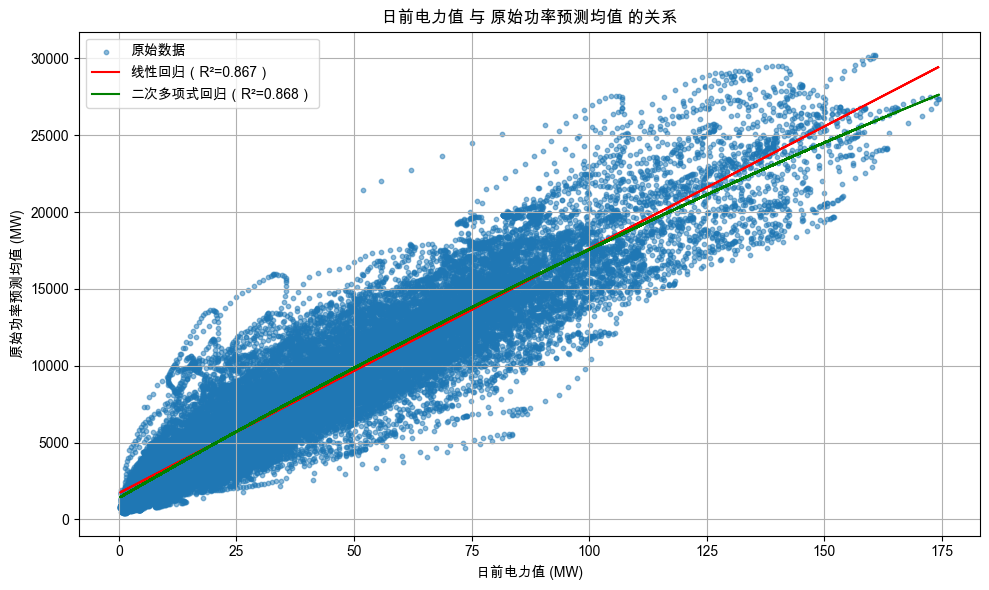

In [25]:
# 画图比较原始数据与拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=10, alpha=0.5, label='原始数据')
plt.plot(X, y_pred_lin, color='red', label=f'线性回归（R²={r2_score(y, y_pred_lin):.3f}）')
plt.plot(X, y_pred_poly, color='green', label=f'二次多项式回归（R²={r2_score(y, y_pred_poly):.3f}）')
# 设置支持中文的字体
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 避免负号显示为方块
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('日前电力值 (MW)')
plt.ylabel('原始功率预测均值 (MW)')
plt.title('日前电力值 与 原始功率预测均值 的关系')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# 提取多项式回归模型的系数
coeffs = poly_reg.coef_
intercept = poly_reg.intercept_

# 构建公式字符串 y = a*x^2 + b*x + c
formula = f"y = {coeffs[2]:.6f} * x^2 + {coeffs[1]:.6f} * x + {intercept:.6f}"
formula

'y = -0.149816 * x^2 + 176.583007 * x + 1394.752732'

In [18]:
# x 为原始功率预测均值（MW）
def predict_day_ahead_power(x):
    return -0.149816 * x**2 + 176.583007 * x + 1394.752732

In [28]:
# 重新提取包含“原始功率预测均值”和“实时电力值”的完整数据
df_full = df[['原始功率预测均值（MW）', '实时电力值(MW)']].dropna()

# 准备输入和输出变量
X_real = df_full[['原始功率预测均值（MW）']].values
y_real = df_full['实时电力值(MW)'].values

# 拟合线性回归
lin_reg_real = LinearRegression()
lin_reg_real.fit(X_real, y_real)
y_pred_lin_real = lin_reg_real.predict(X_real)

# 拟合多项式回归（二次）
X_poly_real = poly.fit_transform(X_real)
poly_reg_real = LinearRegression()
poly_reg_real.fit(X_poly_real, y_real)
y_pred_poly_real = poly_reg_real.predict(X_poly_real)

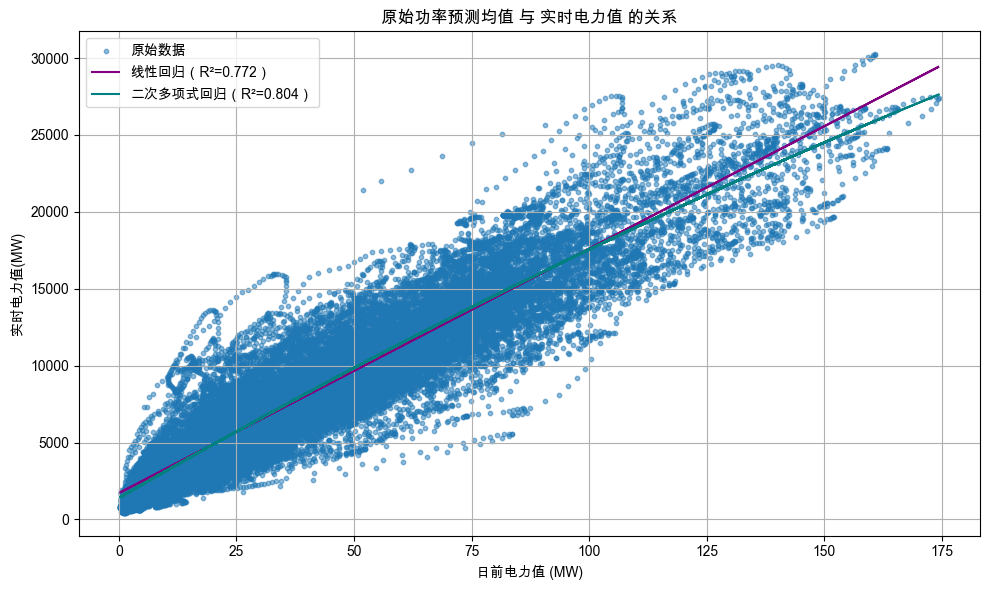

In [29]:
# 画图展示
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=10, alpha=0.5, label='原始数据')
plt.plot(X, y_pred_lin, color='purple', label=f'线性回归（R²={r2_score(y_real, y_pred_lin_real):.3f}）')
plt.plot(X, y_pred_poly, color='teal', label=f'二次多项式回归（R²={r2_score(y_real, y_pred_poly_real):.3f}）')
plt.xlabel('日前电力值 (MW)')
plt.ylabel('实时电力值(MW)')
plt.title('原始功率预测均值 与 实时电力值 的关系')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# 提取多项式回归系数
coeffs_real = poly_reg_real.coef_
intercept_real = poly_reg_real.intercept_

# 构建预测函数表达式
formula_real = f"y = {coeffs_real[2]:.6f} * x^2 + {coeffs_real[1]:.6f} * x + {intercept_real:.6f}"
formula_real

'y = -0.629997 * x^2 + 203.500199 * x + 1491.410138'

In [ ]:
# x 为原始功率预测均值（单位：MW）
def predict_real_time_power(x):
    return -0.629997 * x**2 + 203.500199 * x + 1491.410138